In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [2]:
data = pd.read_csv('Airline.csv')
data.head(10)

NameError: name 'pd' is not defined

NameError: name 'df' is not defined

In [3]:
# Check for missing values
print(data.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64


In [4]:
# Select only columns with numeric data types
numeric_columns = data.select_dtypes(include='number')

In [5]:
# Calculate the median for numeric columns
median_values = numeric_columns.median()

In [6]:
# Fill missing values in numeric columns with their respective median
data[numeric_columns.columns] = numeric_columns.fillna(median_values)



In [7]:
# Check if missing values have been handled
print(data.isnull().sum())

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [8]:
# Handle missing values in non-numeric columns (filling with mode)
non_numeric_columns = data.select_dtypes(exclude='number')
for column in non_numeric_columns:
    mode_value = data[column].mode().iloc[0]  # Calculate mode
    data[column].fillna(mode_value, inplace=True)  # Fill missing values with mode


In [9]:
# Drop rows with missing values
data.dropna(inplace=True)

In [10]:
# Fill missing values in numerical columns with mean
numerical_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
                  'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                  'security_delay', 'late_aircraft_delay']

for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)


In [11]:
# Forward fill missing values
data.fillna(method='ffill', inplace=True)


D:\LDPlayer\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


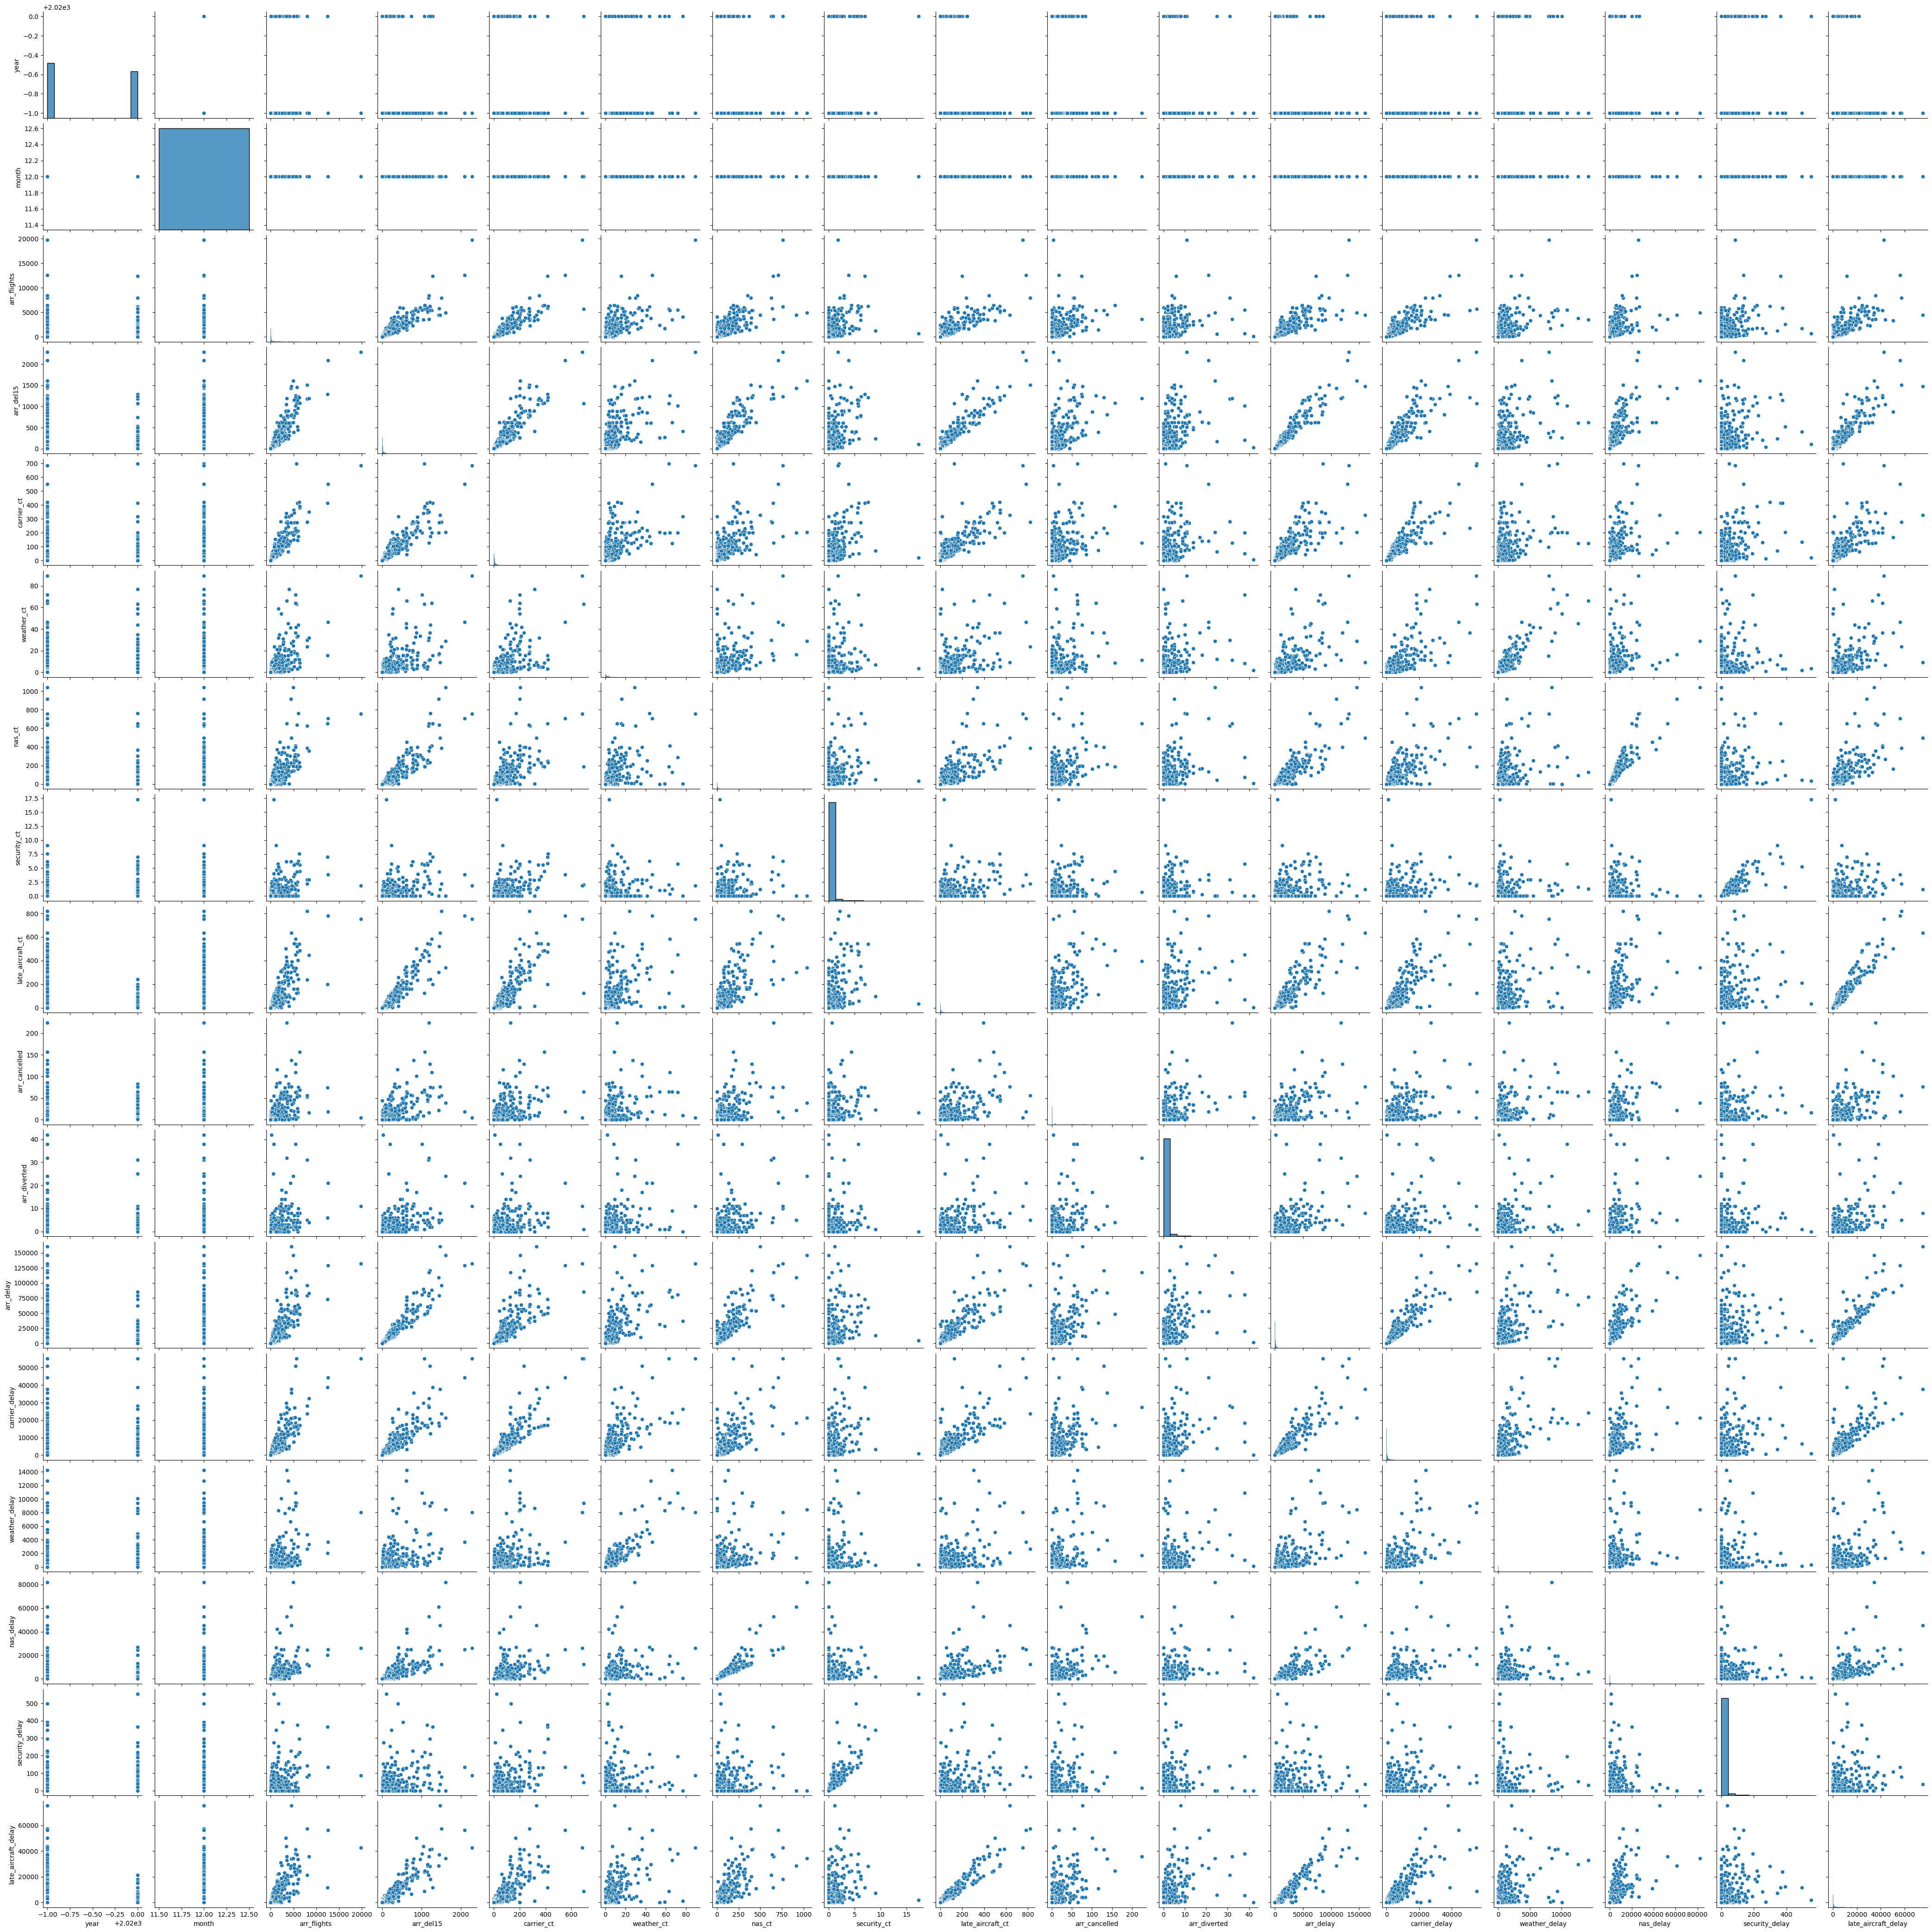

In [12]:
sns.pairplot(data)  # Pairplot for visualizing pairwise relationships
plt.show()

In [13]:
# List of numerical columns
numerical_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
                  'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
                  'security_delay', 'late_aircraft_delay']

In [14]:
# Iterate through numerical columns and fill missing values with mean
for col in numerical_cols:
    if data[col].dtype != 'object':  # Check if the column is numeric
        data[col].fillna(data[col].mean(), inplace=True)

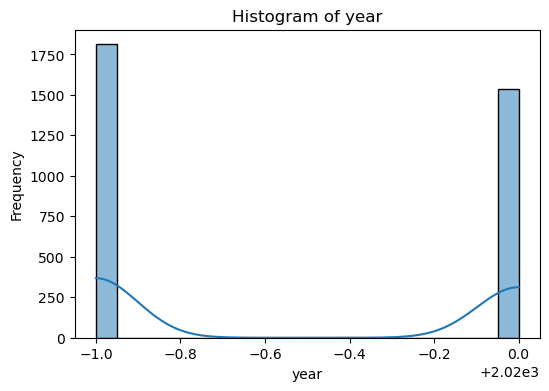

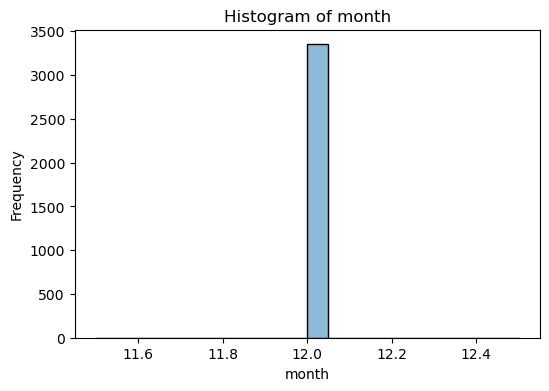

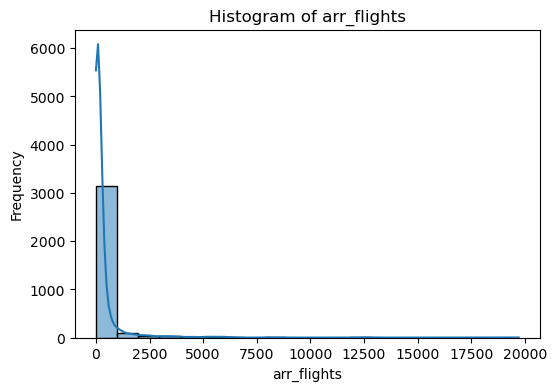

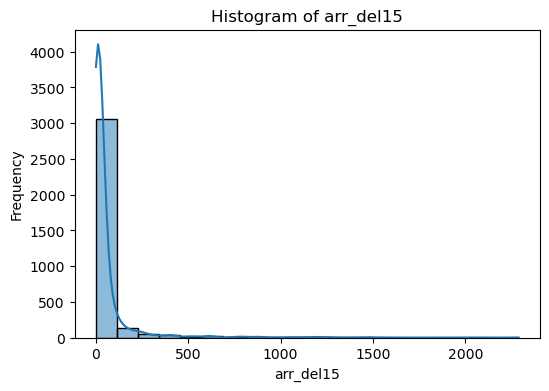

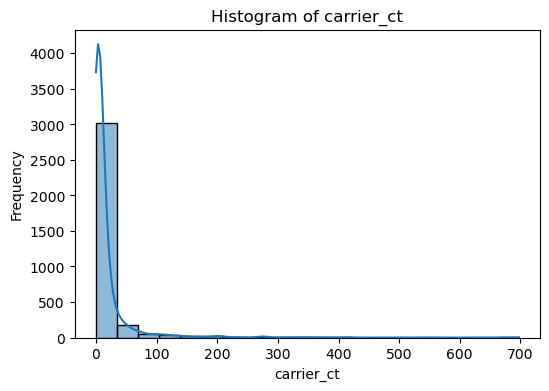

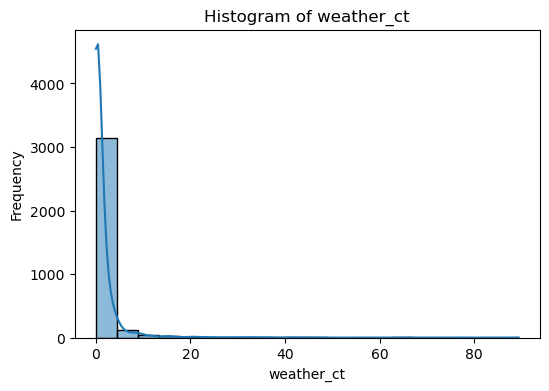

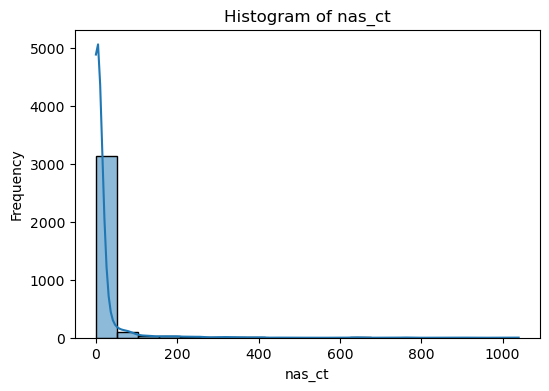

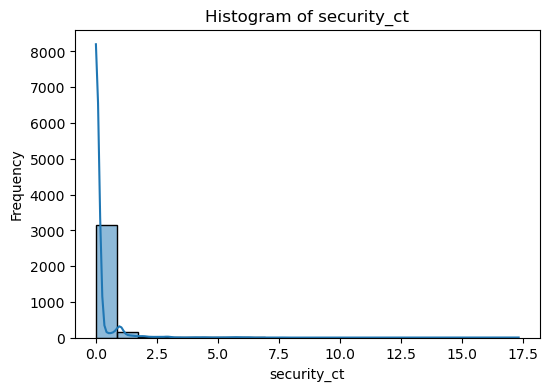

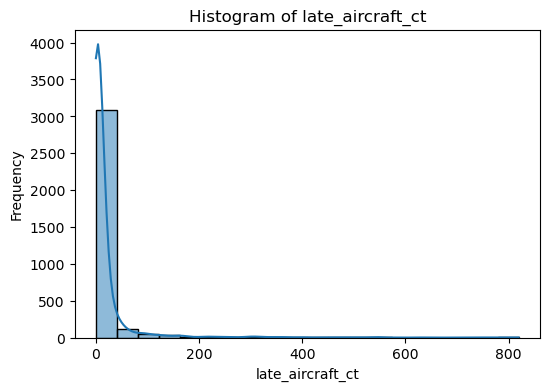

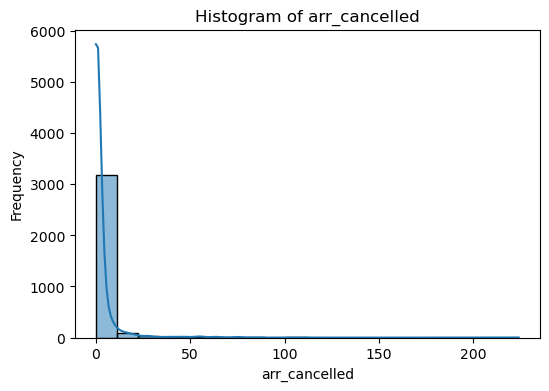

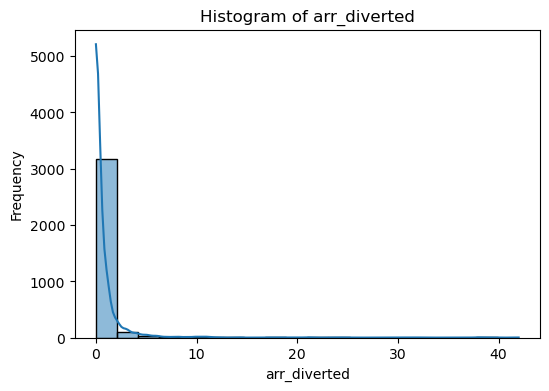

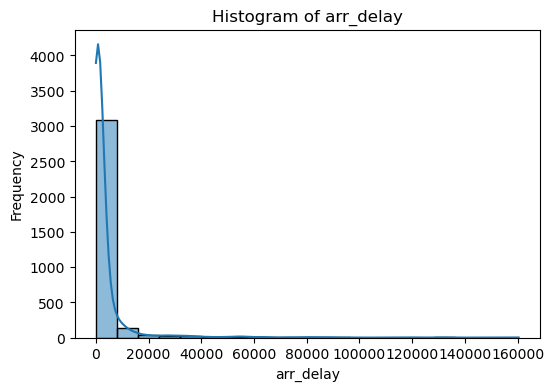

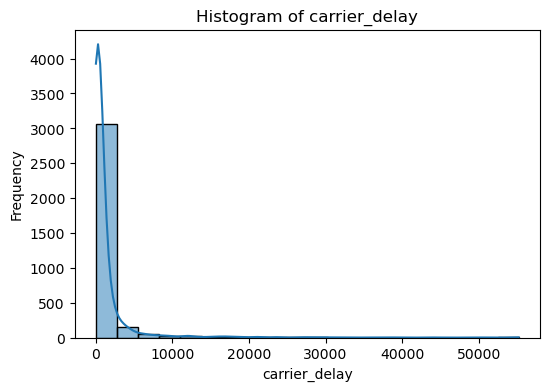

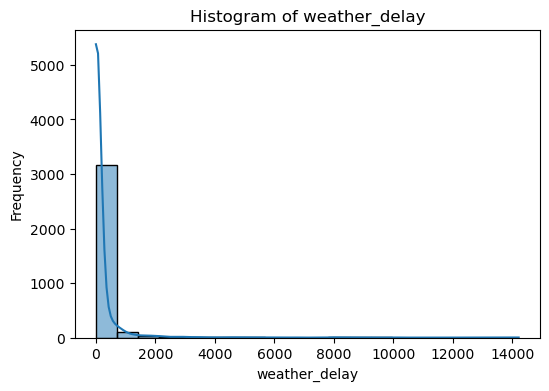

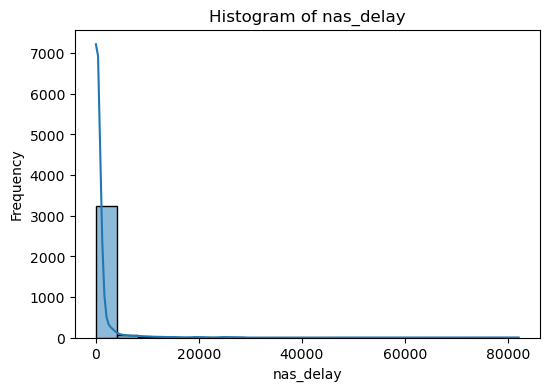

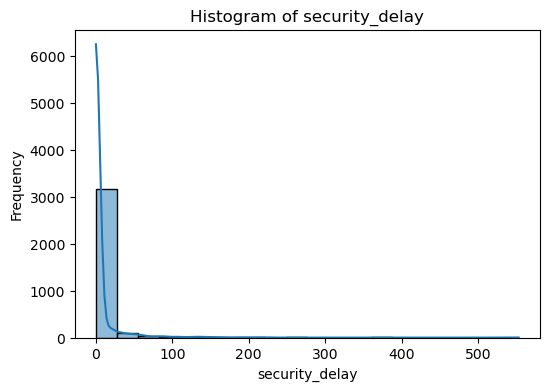

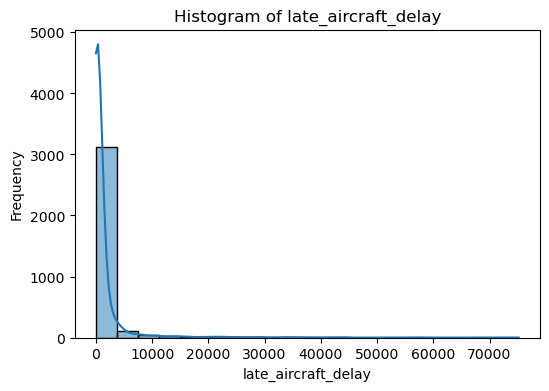

In [15]:
# Plotting histograms for numerical variables
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

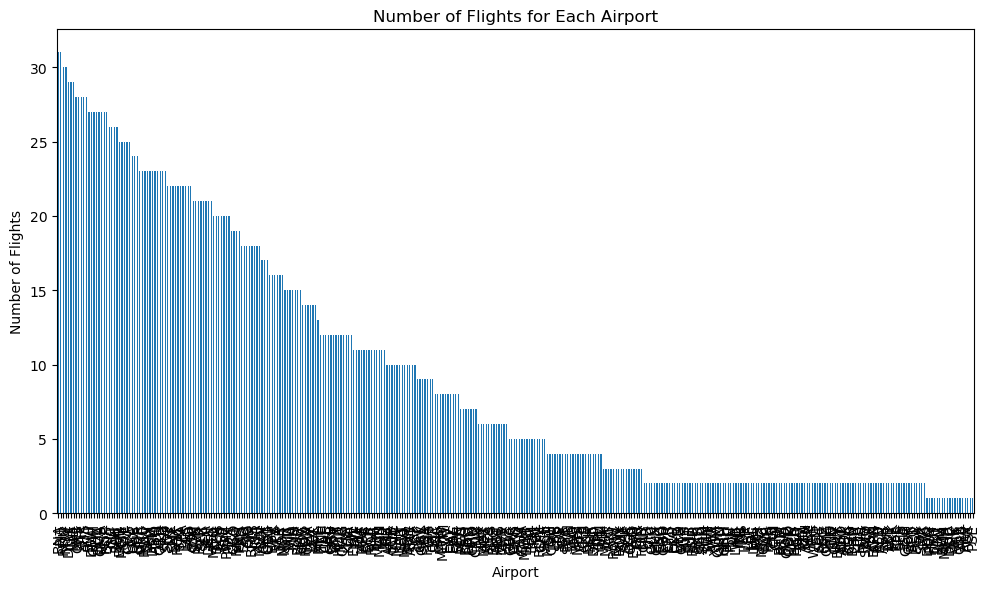

In [16]:
# Plot the number of flights for each airport using the 'airport' column
flight_count_per_airport = data['airport'].value_counts()

plt.figure(figsize=(10, 6))
flight_count_per_airport.plot(kind='bar')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Number of Flights for Each Airport')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [17]:
# Dropping non-numeric columns that won't be converted (such as names or IDs)
non_numeric_cols = ['carrier_name', 'airport_name']  # Add other non-numeric columns if needed
data_numeric = data.drop(non_numeric_cols, axis=1)

In [18]:
# Convert categorical columns to numerical using One-Hot Encoding
categorical_cols = ['carrier', 'airport', 'month']  # Specify categorical columns
data_numeric = pd.get_dummies(data_numeric, columns=categorical_cols)


In [19]:
# Handling missing values (if any)
data_numeric.fillna(data_numeric.mean(), inplace=True)  # Filling missing values with column means


In [20]:
# Instantiate the model
model_lr = LinearRegression()

In [21]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Instantiate the model
model_lr = LinearRegression()


In [24]:
# Train the model
model_lr.fit(X_train, y_train)  # Training on the training set


LinearRegression()

In [25]:
# Make predictions on the test set
predictions_lr = model_lr.predict(X_test)


In [26]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lr})
print(results)

         Actual   Predicted
0     42.671378   42.738851
1     75.014083   74.896386
2     -4.055391   -4.022524
3   -295.721634 -295.663317
4     44.432433   44.513806
..          ...         ...
195 -275.098466 -275.140141
196  -79.699304  -79.820964
197  -94.700795  -94.701463
198  -42.841123  -42.702590
199   81.534661   81.509785

[200 rows x 2 columns]


In [27]:
from sklearn.tree import DecisionTreeRegressor


In [28]:
# Instantiate the model
model_dt = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)


In [29]:
# Train the model
model_dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [30]:
# Make predictions
predictions_dt = model_dt.predict(X_test)


In [31]:
# Display the actual values and predicted values in a DataFrame for comparison
results_dt = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_dt})
print(results_dt)

         Actual   Predicted
0     42.671378   20.831345
1     75.014083  115.434864
2     -4.055391  -72.575002
3   -295.721634 -232.014640
4     44.432433   -1.478938
..          ...         ...
195 -275.098466 -232.014640
196  -79.699304  -14.454352
197  -94.700795 -149.956175
198  -42.841123  -25.643274
199   81.534661   52.693901

[200 rows x 2 columns]


In [32]:
from sklearn.ensemble import RandomForestRegressor


In [33]:
# Instantiate the model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)


In [34]:
# Train the model
model_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=5)

In [35]:
# Make predictions
predictions_rf = model_rf.predict(X_test)


In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_lr})
print(results)

         Actual   Predicted
0     42.671378   42.738851
1     75.014083   74.896386
2     -4.055391   -4.022524
3   -295.721634 -295.663317
4     44.432433   44.513806
..          ...         ...
195 -275.098466 -275.140141
196  -79.699304  -79.820964
197  -94.700795  -94.701463
198  -42.841123  -42.702590
199   81.534661   81.509785

[200 rows x 2 columns]


In [37]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Instantiate the Support Vector Machine for regression (SVR) model
model_svm = SVR(kernel='rbf', C=1.0, gamma='scale')


In [40]:
# Train the model
model_svm.fit(X_train, y_train)


SVR()

In [41]:
# Make predictions on the test set
predictions_svm = model_svm.predict(X_test)


In [42]:
# Display the actual values and predicted values in a DataFrame for comparison
results_svm = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_svm})
print(results_svm)

         Actual  Predicted
0     42.671378  12.174729
1     75.014083  15.301115
2     -4.055391   2.598696
3   -295.721634 -43.898581
4     44.432433   9.969611
..          ...        ...
195 -275.098466 -17.012821
196  -79.699304 -10.988181
197  -94.700795 -10.337132
198  -42.841123  -2.890092
199   81.534661  16.879671

[200 rows x 2 columns]


In [43]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Instantiate the K-Nearest Neighbors for regression (KNeighborsRegressor) model
model_knn = KNeighborsRegressor(n_neighbors=5)


In [46]:
# Train the model
model_knn.fit(X_train, y_train)


KNeighborsRegressor()

In [47]:
# Make predictions on the test set
predictions_knn = model_knn.predict(X_test)


In [48]:
# Display the actual values and predicted values in a DataFrame for comparison
results_knn = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_knn})
print(results_knn)

         Actual   Predicted
0     42.671378   77.420452
1     75.014083   -7.581329
2     -4.055391    7.993500
3   -295.721634 -216.007887
4     44.432433   50.397349
..          ...         ...
195 -275.098466 -141.779920
196  -79.699304  -36.857899
197  -94.700795  -53.074200
198  -42.841123  -14.293326
199   81.534661   29.388843

[200 rows x 2 columns]


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

In [50]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Instantiate the Gradient Boosting for regression (GradientBoostingRegressor) model
model_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)


In [53]:
# Train the model
model_gbm.fit(X_train, y_train)


GradientBoostingRegressor()

In [54]:
# Make predictions on the test set
predictions_gbm = model_gbm.predict(X_test)


In [55]:
# Display the actual values and predicted values in a DataFrame for comparison
results_gbm = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gbm})
print(results_gbm)

         Actual   Predicted
0     42.671378   41.521326
1     75.014083   30.358826
2     -4.055391   -1.779356
3   -295.721634 -247.792389
4     44.432433   18.137169
..          ...         ...
195 -275.098466 -217.115063
196  -79.699304  -68.828429
197  -94.700795 -154.027505
198  -42.841123  -14.409971
199   81.534661   65.011319

[200 rows x 2 columns]


In [56]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Define the parameter grid to search through
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1.0, 10.0],
    'gamma': ['scale', 'auto']
}


In [59]:
# Instantiate the Support Vector Machine for regression (SVR) model
model_svm = SVR()

In [60]:
# Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(model_svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [61]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [62]:
# Make predictions using the best model
predictions = best_estimator.predict(X_test)


In [63]:
# Display the actual values and predicted values in a DataFrame for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)


         Actual   Predicted
0     42.671378   42.733680
1     75.014083   74.899990
2     -4.055391   -4.016311
3   -295.721634 -295.658606
4     44.432433   44.507385
..          ...         ...
195 -275.098466 -275.136568
196  -79.699304  -79.822427
197  -94.700795  -94.701556
198  -42.841123  -42.695785
199   81.534661   81.511321

[200 rows x 2 columns]


In [64]:
# Access the best parameters found by Grid Search
print("Best Parameters:", best_params)

Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}


In [65]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Instantiate models
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1)


In [68]:
# List of models for evaluation
models = [model_lr, model_dt, model_rf]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']


In [69]:
# Evaluate each model
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    predictions = model.predict(X_test)
     # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # Display evaluation metrics
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    print("--------------------------")

Model: Linear Regression
Mean Absolute Error (MAE): 0.0777
Mean Squared Error (MSE): 0.0095
R-squared (R²) Score: 1.0000
--------------------------
Model: Decision Tree
Mean Absolute Error (MAE): 65.6618
Mean Squared Error (MSE): 6512.1982
R-squared (R²) Score: 0.6140
--------------------------
Model: Random Forest
Mean Absolute Error (MAE): 54.1950
Mean Squared Error (MSE): 4462.6566
R-squared (R²) Score: 0.7355
--------------------------


In [70]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [71]:
# Create pipelines for different models
lr_pipeline = make_pipeline(StandardScaler(), LinearRegression())
dt_pipeline = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=5))
rf_pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, max_depth=5))


In [72]:
# List of pipelines for evaluation
pipelines = [lr_pipeline, dt_pipeline, rf_pipeline]
pipeline_names = ['Linear Regression Pipeline', 'Decision Tree Pipeline', 'Random Forest Pipeline']


In [73]:
# List of pipelines for evaluation
pipelines = [lr_pipeline, dt_pipeline, rf_pipeline]
pipeline_names = ['Linear Regression Pipeline', 'Decision Tree Pipeline', 'Random Forest Pipeline']

# Evaluate each pipeline using cross-validation
for pipeline, name in zip(pipelines, pipeline_names):
    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
    
    # Convert negative MSE to positive for readability
    mse_scores = -scores
    
    # Calculate mean MSE
    mean_mse = mse_scores.mean()
    # Display evaluation metrics for each pipeline
    print(f"Evaluation metrics for {name}:")
    print(f"Mean Squared Error (MSE): {mean_mse:.4f}")
    print("--------------------------")

Evaluation metrics for Linear Regression Pipeline:
Mean Squared Error (MSE): 0.0096
--------------------------
Evaluation metrics for Decision Tree Pipeline:
Mean Squared Error (MSE): 7029.6807
--------------------------
Evaluation metrics for Random Forest Pipeline:
Mean Squared Error (MSE): 4272.0670
--------------------------


In [74]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)


In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Data preprocessing - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [77]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [78]:
# Hyperparameter tuning and model training
for name, model in models.items():
    if name == 'Linear Regression':
        # For Linear Regression, no hyperparameter tuning is necessary
        model.fit(X_train_scaled, y_train)
    else:
        # Hyperparameter tuning using GridSearchCV for other models
        parameters = {}  # Add parameters for tuning
        grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_scaled, y_train)
        models[name] = best_model

# Evaluation
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    print("--------------------------")

Model: Linear Regression
Mean Squared Error (MSE): 0.0095
R-squared (R²) Score: 1.0000
--------------------------
Model: Decision Tree
Mean Squared Error (MSE): 6609.0489
R-squared (R²) Score: 0.6083
--------------------------
Model: Random Forest
Mean Squared Error (MSE): 2734.7477
R-squared (R²) Score: 0.8379
--------------------------
Model: Support Vector Machine
Mean Squared Error (MSE): 12690.7817
R-squared (R²) Score: 0.2478
--------------------------
Model: K-Nearest Neighbors
Mean Squared Error (MSE): 3741.0273
R-squared (R²) Score: 0.7783
--------------------------
Model: Gradient Boosting
Mean Squared Error (MSE): 1244.9521
R-squared (R²) Score: 0.9262
--------------------------


# another try to raise up the accuracy

In [79]:
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
# Generate example data (replace this with your dataset)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)



In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Data preprocessing - Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Define a simple TensorFlow model (replace with your desired architecture)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

In [84]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


In [85]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100


25/25 [==============================] - 1s 12ms/step - loss: 17504.8555 - mean_squared_error: 17504.8555 - val_loss: 17012.5625 - val_mean_squared_error: 17012.5625
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 17317.7207 - mean_squared_error: 17317.7207 - val_loss: 16753.1055 - val_mean_squared_error: 16753.1055
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 16960.3672 - mean_squared_error: 16960.3672 - val_loss: 16272.3496 - val_mean_squared_error: 16272.3496
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 16311.9121 - mean_squared_error: 16311.9121 - val_loss: 15389.5811 - val_mean_squared_error: 15389.5811
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 15182.4961 - mean_squared_error: 15182.4961 - val_loss: 14007.0996 - val_mean_squared_error: 14007.0996
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 13483.7666 - mean_squared_error: 13483.

Epoch 47/100
25/25 [==============================] - 0s 3ms/step - loss: 59.1821 - mean_squared_error: 59.1821 - val_loss: 55.2806 - val_mean_squared_error: 55.2806
Epoch 48/100
25/25 [==============================] - 0s 3ms/step - loss: 56.1475 - mean_squared_error: 56.1475 - val_loss: 54.3161 - val_mean_squared_error: 54.3161
Epoch 49/100
25/25 [==============================] - 0s 3ms/step - loss: 54.2966 - mean_squared_error: 54.2966 - val_loss: 52.6682 - val_mean_squared_error: 52.6682
Epoch 50/100
25/25 [==============================] - 0s 3ms/step - loss: 52.8573 - mean_squared_error: 52.8573 - val_loss: 51.9213 - val_mean_squared_error: 51.9213
Epoch 51/100
25/25 [==============================] - 0s 3ms/step - loss: 51.5660 - mean_squared_error: 51.5660 - val_loss: 50.1002 - val_mean_squared_error: 50.1002
Epoch 52/100
25/25 [==============================] - 0s 4ms/step - loss: 49.7977 - mean_squared_error: 49.7977 - val_loss: 49.0800 - val_mean_squared_error: 49.0800
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 10.2626 - mean_squared_error: 10.2626 - val_loss: 13.8856 - val_mean_squared_error: 13.8856
Epoch 97/100
25/25 [==============================] - 0s 4ms/step - loss: 9.8083 - mean_squared_error: 9.8083 - val_loss: 13.9637 - val_mean_squared_error: 13.9637
Epoch 98/100
25/25 [==============================] - 0s 3ms/step - loss: 9.4377 - mean_squared_error: 9.4377 - val_loss: 13.1665 - val_mean_squared_error: 13.1665
Epoch 99/100
25/25 [==============================] - 0s 3ms/step - loss: 9.0693 - mean_squared_error: 9.0693 - val_loss: 12.8765 - val_mean_squared_error: 12.8765
Epoch 100/100
25/25 [==============================] - 0s 3ms/step - loss: 8.6956 - mean_squared_error: 8.6956 - val_loss: 12.7892 - val_mean_squared_error: 12.7892


In [86]:
# Evaluate the model
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

7/7 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 12.7892
R-squared (R²) Score: 0.9992
